## 词云示例

![](./image/word_tag.png)

词云是很有说服力的一种可视化方式，尤其是对于文本中心内容展示，下面我们来学习一下，怎么去生成自己的文本上的词云。

## 导入库

In [208]:
import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

In [209]:
seg_list = jieba.cut("我来到北京清华大学",cut_all=False) # 返回迭代器
seg_list;

In [189]:
seg_list = jieba.lcut("我来自北京清华大学") # 直接返回数组
print(seg_list) 

['我', '来自', '北京', '清华大学']


In [190]:
# 在使用pycharm 的时候python的运行的环境指定该路径
print(np.version,np.version.version)

<module 'numpy.version' from '/anaconda3/lib/python3.7/site-packages/numpy/version.py'> 1.15.1


## 加载新闻，并分词

In [191]:
news_data_path = "./data/entertainment_news.csv"
news_data_df = pd.read_csv(news_data_path,sep=",",encoding="utf-8",names=["id","content"],header=0)
news_data_df.head()

,id,content
0,0,2016年是综艺井喷的一年，《2016年中国网络视听发展研究报告》数据显示，截至2016...
1,1,区别
2,2,平台决定了资源的多寡和资本的投入
3,3,网络综艺和电视综艺最大的区别在哪？其实是平台。因为平台决定了资源的多寡和资本的投入。所以...
4,4,网络综艺与电视综艺在播出模式、观众群体以及节目板块等方面也都存在差异。在传播上，电视台比...


In [76]:
# 总共40202 行记录，2列
news_data_df.shape

(40201, 2)

In [77]:
news_data_df.dtypes

id          int64
content    object
dtype: object

In [109]:
# 检查是否有空行
nan_rows = news_data_df[news_data_df.isnull().T.any().T]
nan_rows[0:10]

,id,content
42,42,NaN
43,43,NaN
44,44,NaN
394,394,NaN
412,412,NaN
436,436,NaN
438,438,NaN
442,442,NaN
446,446,NaN
450,450,NaN


In [117]:
# 删除空行
news_data_df = news_data_df.dropna()

In [118]:
nan_rows = news_data_df[news_data_df.isnull().T.any().T]
nan_rows

,id,content


In [165]:
segment=[]
content = news_data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip()) # 去除空格
        for seg in seg_list:
            if len(seg) > 1: # 单个子去除
                segment.append(seg) 
    except Exception:
        continue

In [166]:
print(segment[0:10])

['2016', '综艺', '井喷', '一年', '2016', '中国', '网络', '视听', '发展', '研究']


## 去除停用此词

In [167]:
stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
stopwords_data_df.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [168]:
type(stopwords_data_df.stopword)

pandas.core.series.Series

In [169]:
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]
words_df.head()

,segment
1,综艺
2,井喷
3,一年
5,中国
6,网络


## 统计词频

In [170]:
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf.head()

,count
segment,
\r\n,2
##,1
....,11
0.01,1
0.04,1


In [173]:
words_tf = words_tf.reset_index(drop=True).sort_values(by="count",ascending=False)
words_tf.head()

,segment,count
0,电影,10230
1,观众,5574
2,中国,5476
3,节目,4398
4,导演,4197


当数据量比较大的时候，上面的结果我们完全可以通过spark sql 来进行统计完成，输出<word,count> ,然后作为词云的输入

In [174]:
words_tf.to_csv('./data/words_tf.txt',sep="\t")

## 词云处理

In [216]:
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(1000).values}
word_frequencies

{'电影': 10230,
 '观众': 5574,
 '中国': 5476,
 '节目': 4398,
 '导演': 4197,
 '演员': 3250,
 '音乐': 3170,
 '影片': 3030,
 '故事': 2643,
 '票房': 2623,
 '网友': 2540,
 '现场': 2499,
 '内容': 2342,
 '直播': 2324,
 '角色': 2270,
 '粉丝': 2238,
 '北京': 2219,
 '作品': 2186,
 '文化': 2072,
 '明星': 2070,
 '制作': 2044,
 '拍摄': 1945,
 '生活': 1838,
 '网络': 1831,
 '平台': 1814,
 '市场': 1810,
 '2017': 1757,
 '饰演': 1747,
 '主演': 1737,
 '日电': 1704,
 '电视剧': 1653,
 '合作': 1637,
 '中新网': 1587,
 '表演': 1584,
 '优酷': 1581,
 '公司': 1538,
 '上映': 1513,
 '视频': 1509,
 '影视': 1507,
 '这部': 1504,
 '播出': 1492,
 '希望': 1479,
 '一部': 1479,
 '时间': 1442,
 '卫视': 1377,
 '春晚': 1344,
 '孩子': 1336,
 '喜欢': 1298,
 '行业': 1296,
 '更是': 1295,
 '剧中': 1281,
 'IP': 1276,
 '创作': 1257,
 '发展': 1255,
 '喜剧': 1245,
 '活动': 1202,
 '关注': 1176,
 '特别': 1171,
 '舞台': 1168,
 '剧情': 1168,
 '人物': 1166,
 '用户': 1139,
 '最佳': 1136,
 '世界': 1105,
 '带来': 1097,
 '方式': 1092,
 '国际': 1072,
 '歌手': 1071,
 '选择': 1054,
 '讲述': 1051,
 '题材': 1034,
 '工作': 1034,
 '团队': 1022,
 '全国': 1018,
 '打造': 1016,
 '媒体': 1003,
 '爱情': 

### 长方形的词云的图形

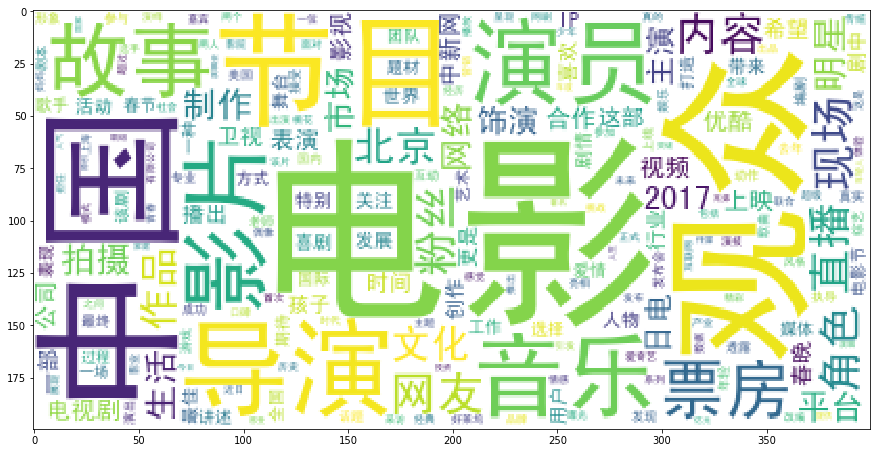

In [229]:
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=100,background_color="white")
wc.fit_words(word_frequencies)
plt.imshow(wc)

### 自定义背景图做词云

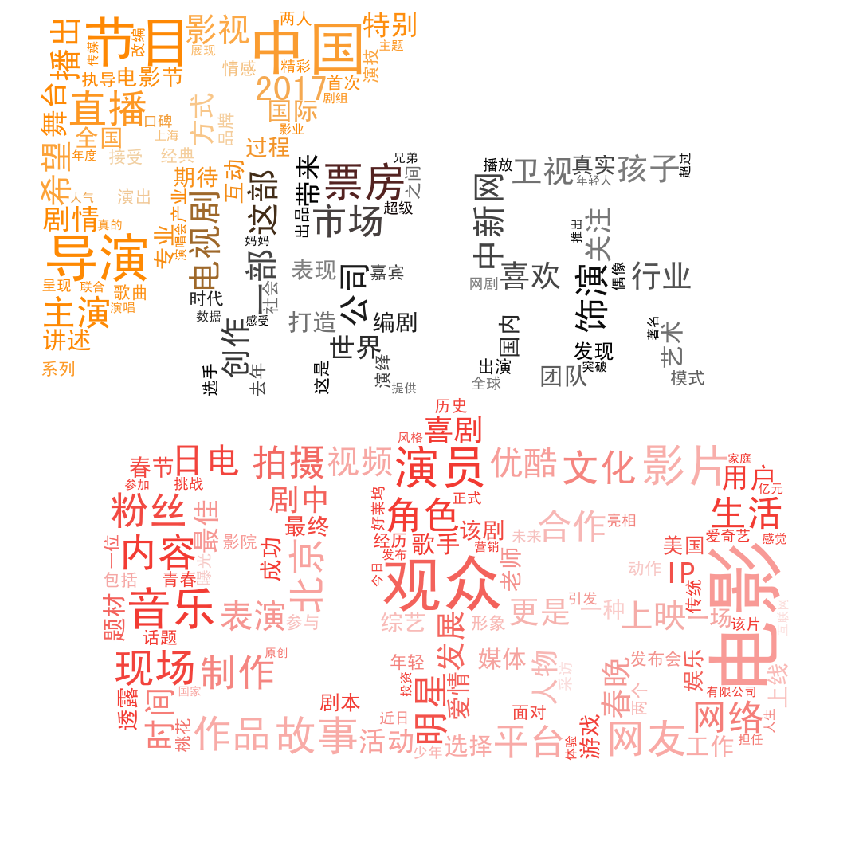

In [230]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg = imread("image/entertainment.jpeg")
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=100,background_color="white",mask=bimg) # 指定背景图
wc.fit_words(word_frequencies)
bimgColors = ImageColorGenerator(bimg) # 基于背景图生成颜色
plt.axis("off")
plt.imshow(wc.recolor(color_func=bimgColors))

## 体育类新闻

In [239]:
## 导入新闻库，分词
data_path = "./data/sports_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]        

  stopword
0        !
1        "
2        #
3        $
4        %


In [240]:
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

      segment  count
38832      比赛   9931
6236       中国   8530
43082      球员   4646
54471      足球   4113
43148      球队   3819


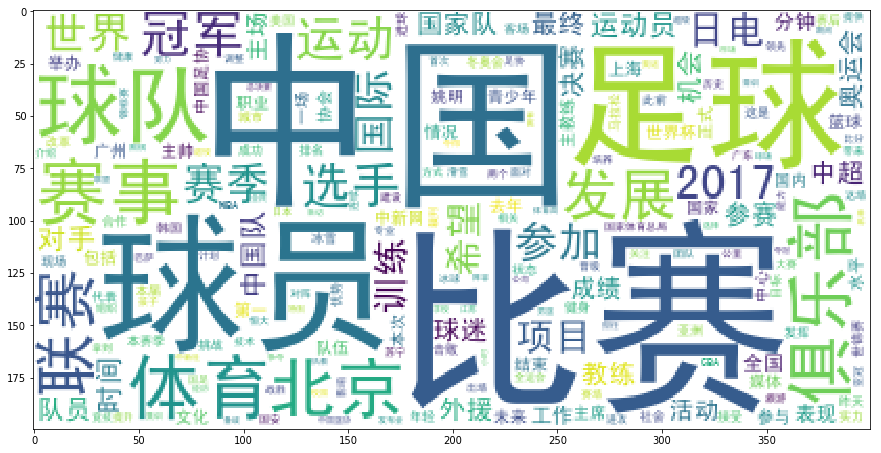

In [241]:
## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(1000).values}
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=100,background_color="white")
wc.fit_words(word_frequencies)
#wc.to_file("./data/sport_news_1.png")
plt.imshow(wc)
#plt.show()

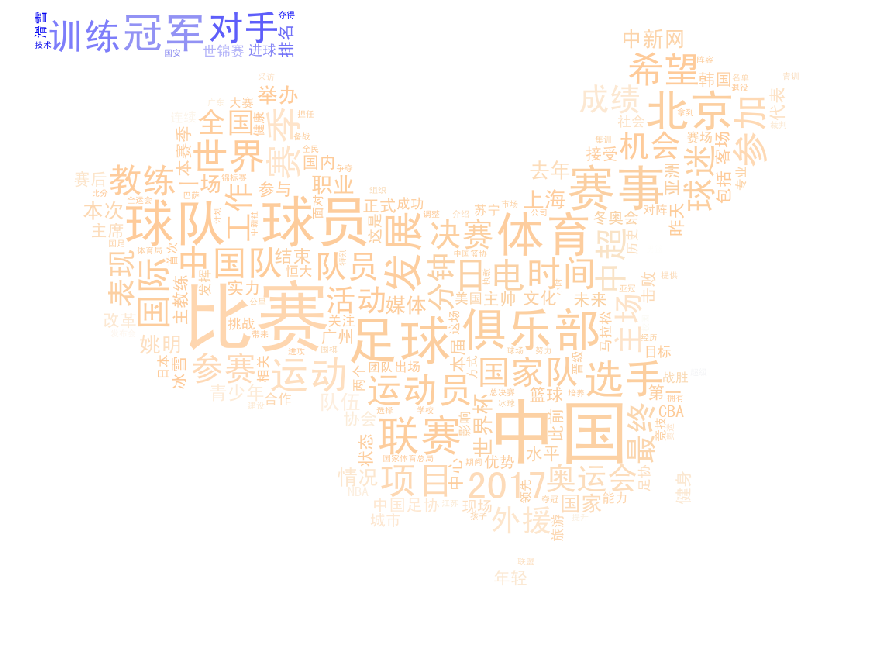

In [242]:
### 自定义背景图做词云
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg = imread("image/view.jpeg")
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=100,background_color="white",mask=bimg) # 指定背景图
wc.fit_words(word_frequencies)
bimgColors = ImageColorGenerator(bimg) # 基于背景图生成颜色
plt.axis("off")
plt.imshow(wc.recolor(color_func=bimgColors))
wc.to_file("./data/sports_news_2.png")

## 房屋新闻

In [247]:
## 导入新闻库，分词
data_path = "./data/house_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]     
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

  stopword
0        !
1        "
2        #
3        $
4        %
      segment  count
17858     房地产   4562
15854      市场   4243
13220      城市   3971
7744       住房   3806
32054      项目   2412


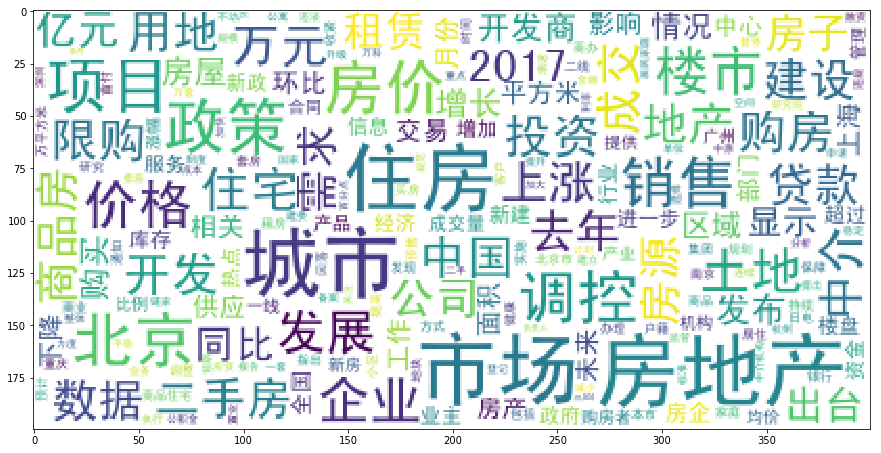

In [252]:
## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(2000).values}
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=40,background_color="white")
wc.fit_words(word_frequencies)
#wc.to_file("./data/sport_news_1.png")
plt.imshow(wc)
#plt.show()

## 科技新闻

In [253]:
## 导入新闻库，分词
data_path = "./data/technology_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]     
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

  stopword
0        !
1        "
2        #
3        $
4        %
      segment  count
41170      用户   6198
30752      技术   4595
33006      数据   4425
10411      中国   4353
30332      手机   4308


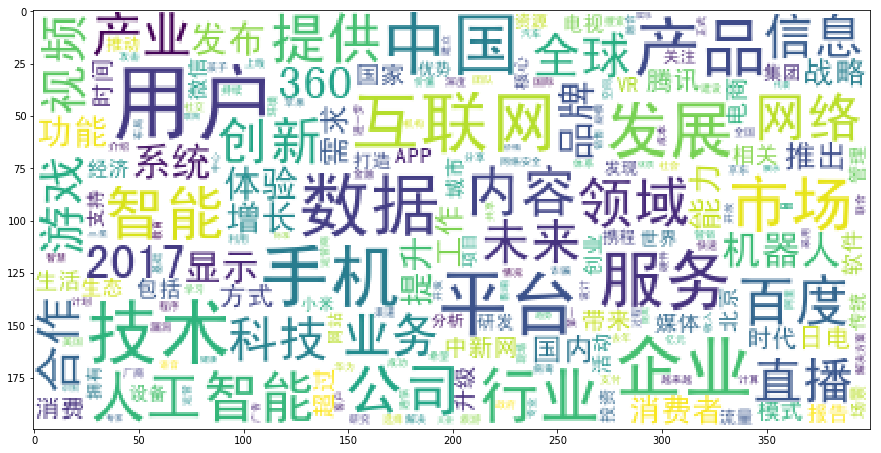

In [254]:
## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(2000).values}
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=40,background_color="white")
wc.fit_words(word_frequencies)
#wc.to_file("./data/sport_news_1.png")
plt.imshow(wc)
#plt.show()

## 金融新闻

  stopword
0        !
1        "
2        #
3        $
4        %
       segment  count
31783       中国  36701
38758       企业  32191
55651       发展  28042
122593      经济  21160
75268       市场  19679


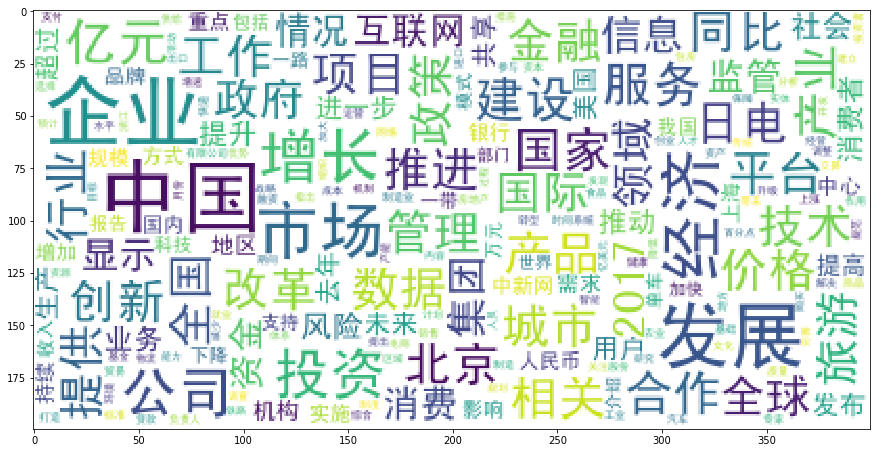

In [255]:
## 导入新闻库，分词
data_path = "./data/finance_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]     
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(2000).values}
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=40,background_color="white")
wc.fit_words(word_frequencies)
#wc.to_file("./data/sport_news_1.png")
plt.imshow(wc)
#plt.show()

## 汽车类

  stopword
0        !
1        "
2        #
3        $
4        %
      segment  count
23176      汽车   7074
6620       中国   2681
16677      市场   2429
20618     新能源   2165
13307      品牌   1844


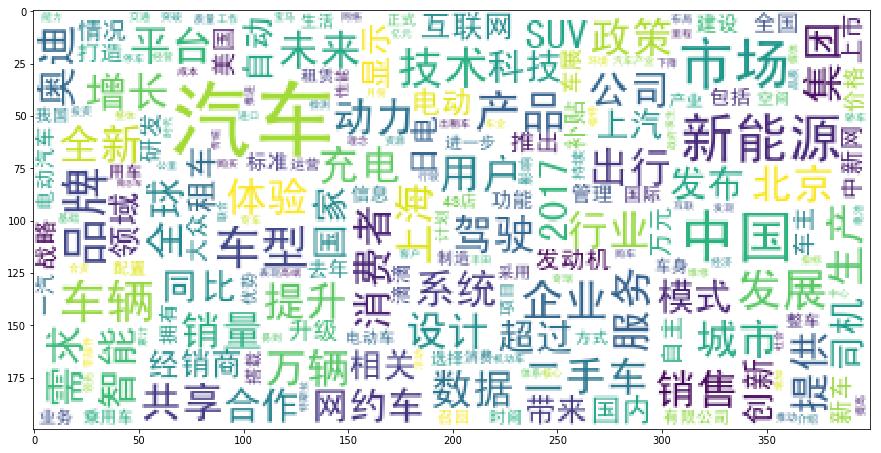

In [260]:
## 导入新闻库，分词
data_path = "./data/car_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]     
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(2000).values}
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=40,background_color="white")
wc.fit_words(word_frequencies)
#wc.to_file("./data/sport_news_1.png")
plt.imshow(wc)
#plt.show()

## 社会类类

  stopword
0        !
1        "
2        #
3        $
4        %
      segment  count
99735      工作  24413
66191      发现  16809
27285      中国  16121
47340      公司  14726
90848      孩子  14719


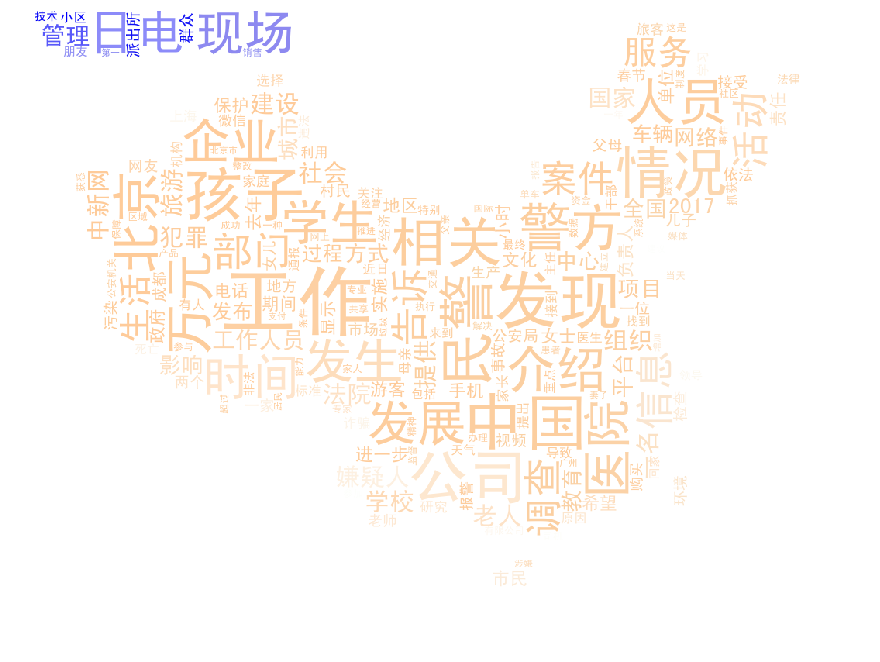

In [261]:
## 导入新闻库，分词
data_path = "./data/society_news.csv"
data_df = pd.read_csv(data_path, sep=",", encoding="utf-8", names=["id", "content"], header=0)
# 删除空行
data_df = data_df.dropna()

segment=[]
content = data_df["content"].tolist()
for line in content:
    try:
        seg_list = jieba.lcut(line.strip())
        for seg in seg_list:
            if len(seg) > 1:
                segment.append(seg)
    except Exception:
        print(line)
        continue

## 去除停用词

stopwords_data_path = "data/stopwords.txt"
stopwords_data_df = pd.read_csv(stopwords_data_path,encoding="utf-8",sep="\t",index_col=None,quoting=3,names=["stopword"])
print(stopwords_data_df.head())
words_df = pd.DataFrame({"segment":segment})
words_df = words_df[~words_df.segment.isin(stopwords_data_df.stopword)]     
## 统计词频
words_tf = words_df.groupby(by = "segment")["segment"].agg({"count":np.size})
words_tf = words_tf.reset_index().sort_values(by="count",ascending=False)
print(words_tf.head())

## 词云
word_frequencies = {}
word_frequencies = {word_count[0]:word_count[1] for word_count in words_tf.head(2000).values}

### 自定义背景图做词云
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg = imread("image/view.jpeg")
wc = WordCloud(font_path="./data/simhei.ttf",max_font_size=100,background_color="white",mask=bimg) # 指定背景图
wc.fit_words(word_frequencies)
bimgColors = ImageColorGenerator(bimg) # 基于背景图生成颜色
plt.axis("off")
plt.imshow(wc.recolor(color_func=bimgColors))
